### Data Collection

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('C:\SUREN_NEW\MACHINE_LEARNING-PROJECTS\DATA\StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

### Dataset Cleaning

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [14]:
df['gender'].dtype
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### FEATURE ENGINEERING

In [15]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
print(df['math score']==100)
print(df[df['math score']==100]['average'])
print(df[df['math score']==100]['average'].count())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool
149     97.666667
451     96.333333
458    100.000000
623     94.000000
625     98.666667
916    100.000000
962    100.000000
Name: average, dtype: float64
7


In [17]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### DATA VISUALIZATION(EDA)

<Axes: xlabel='average', ylabel='Count'>

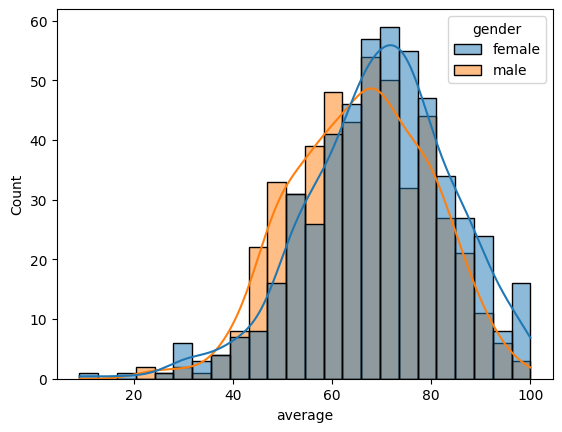

In [19]:
sns.histplot(data=df,x='average',hue='gender',kde=True)
# df where x is average gives us 2 separate datas of m and f containing avg (kde is the line helps to conclude)

<Axes: xlabel='total score', ylabel='Count'>

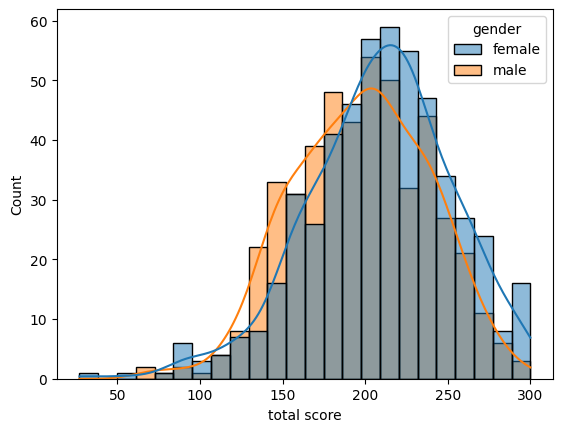

In [20]:
sns.histplot(data=df,x='total score',hue='gender',kde=True)
# df where x is total score gives us 2 separate datas of m and f containing total

<Axes: xlabel='average', ylabel='Count'>

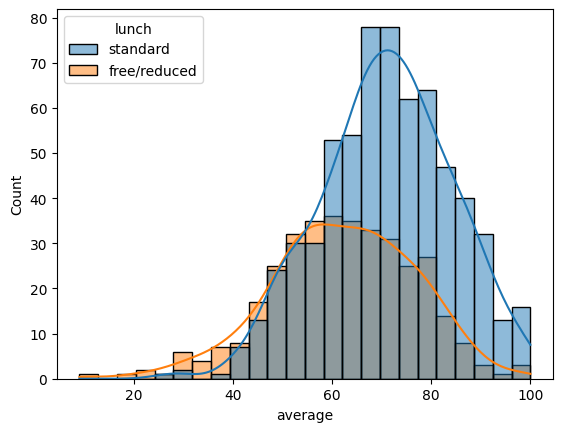

In [21]:
sns.histplot(data=df,x='average',hue='lunch',kde=True)
# sns.histplot(data=df[df.gender=='male'],x='average',hue='lunch',kde=True)
# sns.histplot(data=df[df.gender=='female'],x='average',hue='lunch',kde=True)

<Axes: xlabel='average', ylabel='Count'>

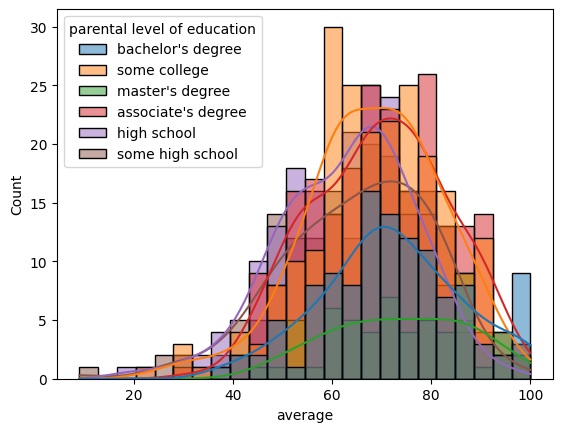

In [22]:
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
# sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
# sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')

<Axes: xlabel='average', ylabel='Count'>

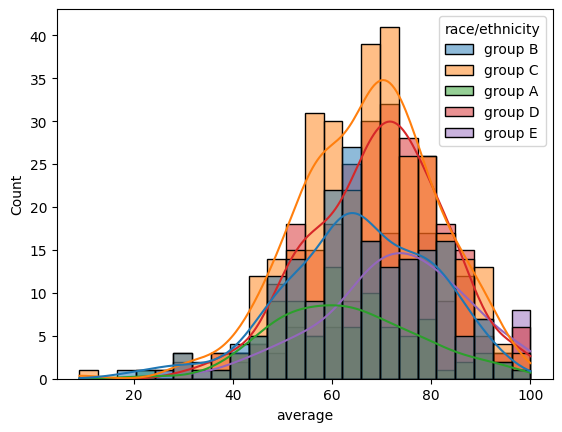

In [23]:
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
# sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
# sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')

<Axes: ylabel='math score'>

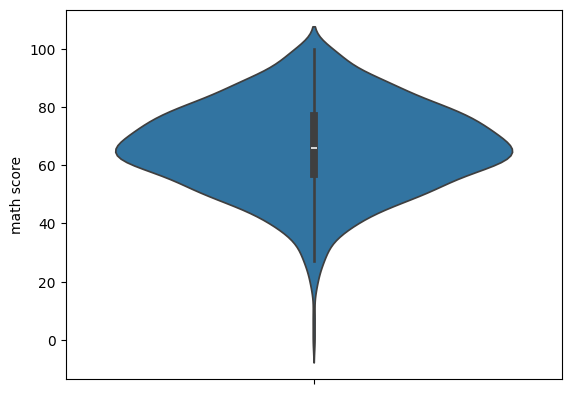

In [24]:
sns.violinplot(y='math score',data=df)
# sns.violinplot(y='writing score',data=df)
# sns.violinplot(y='reading score',data=df)

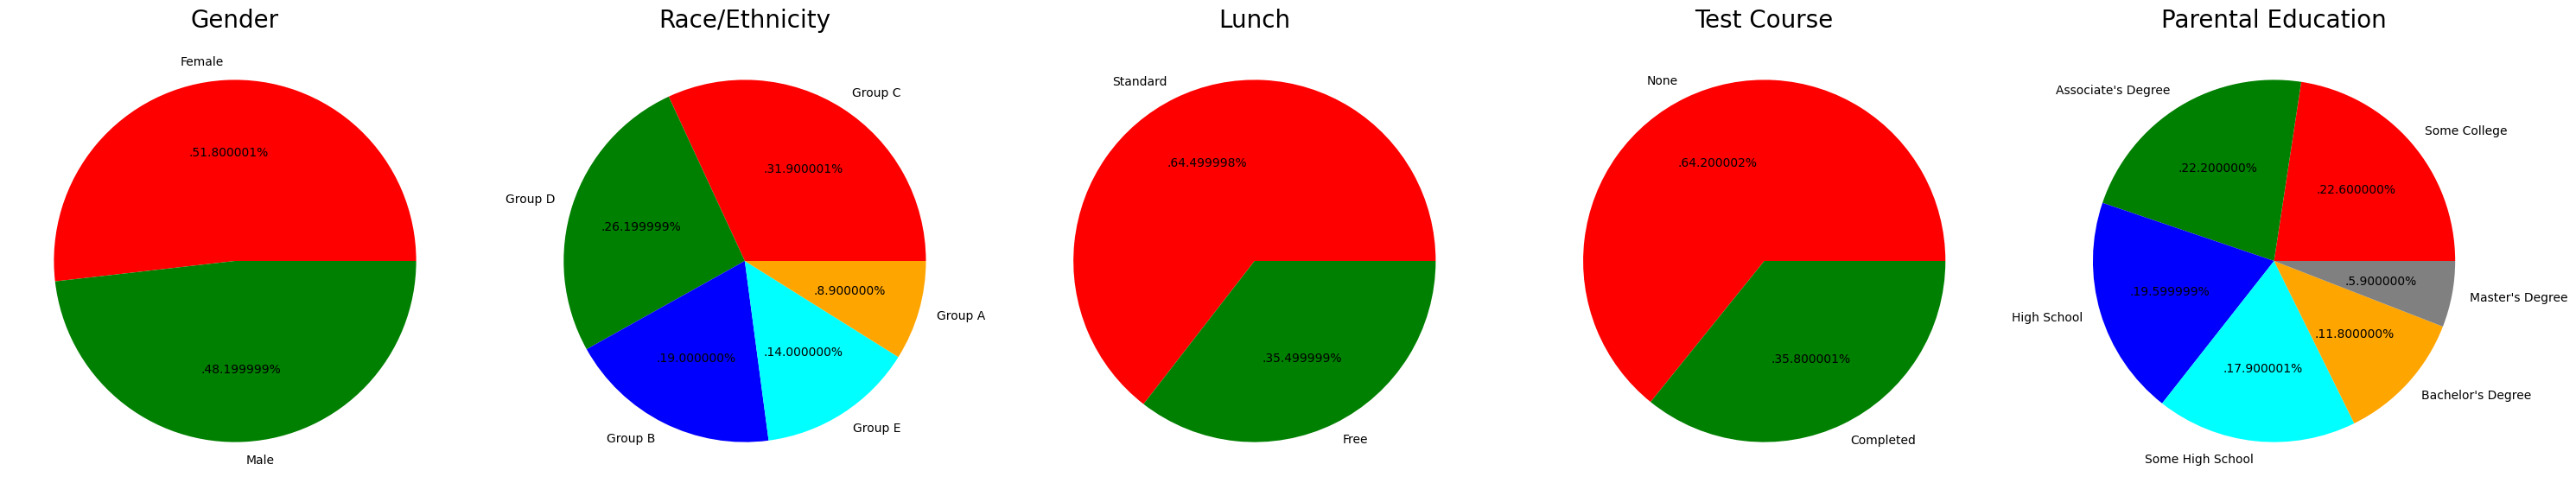

In [25]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


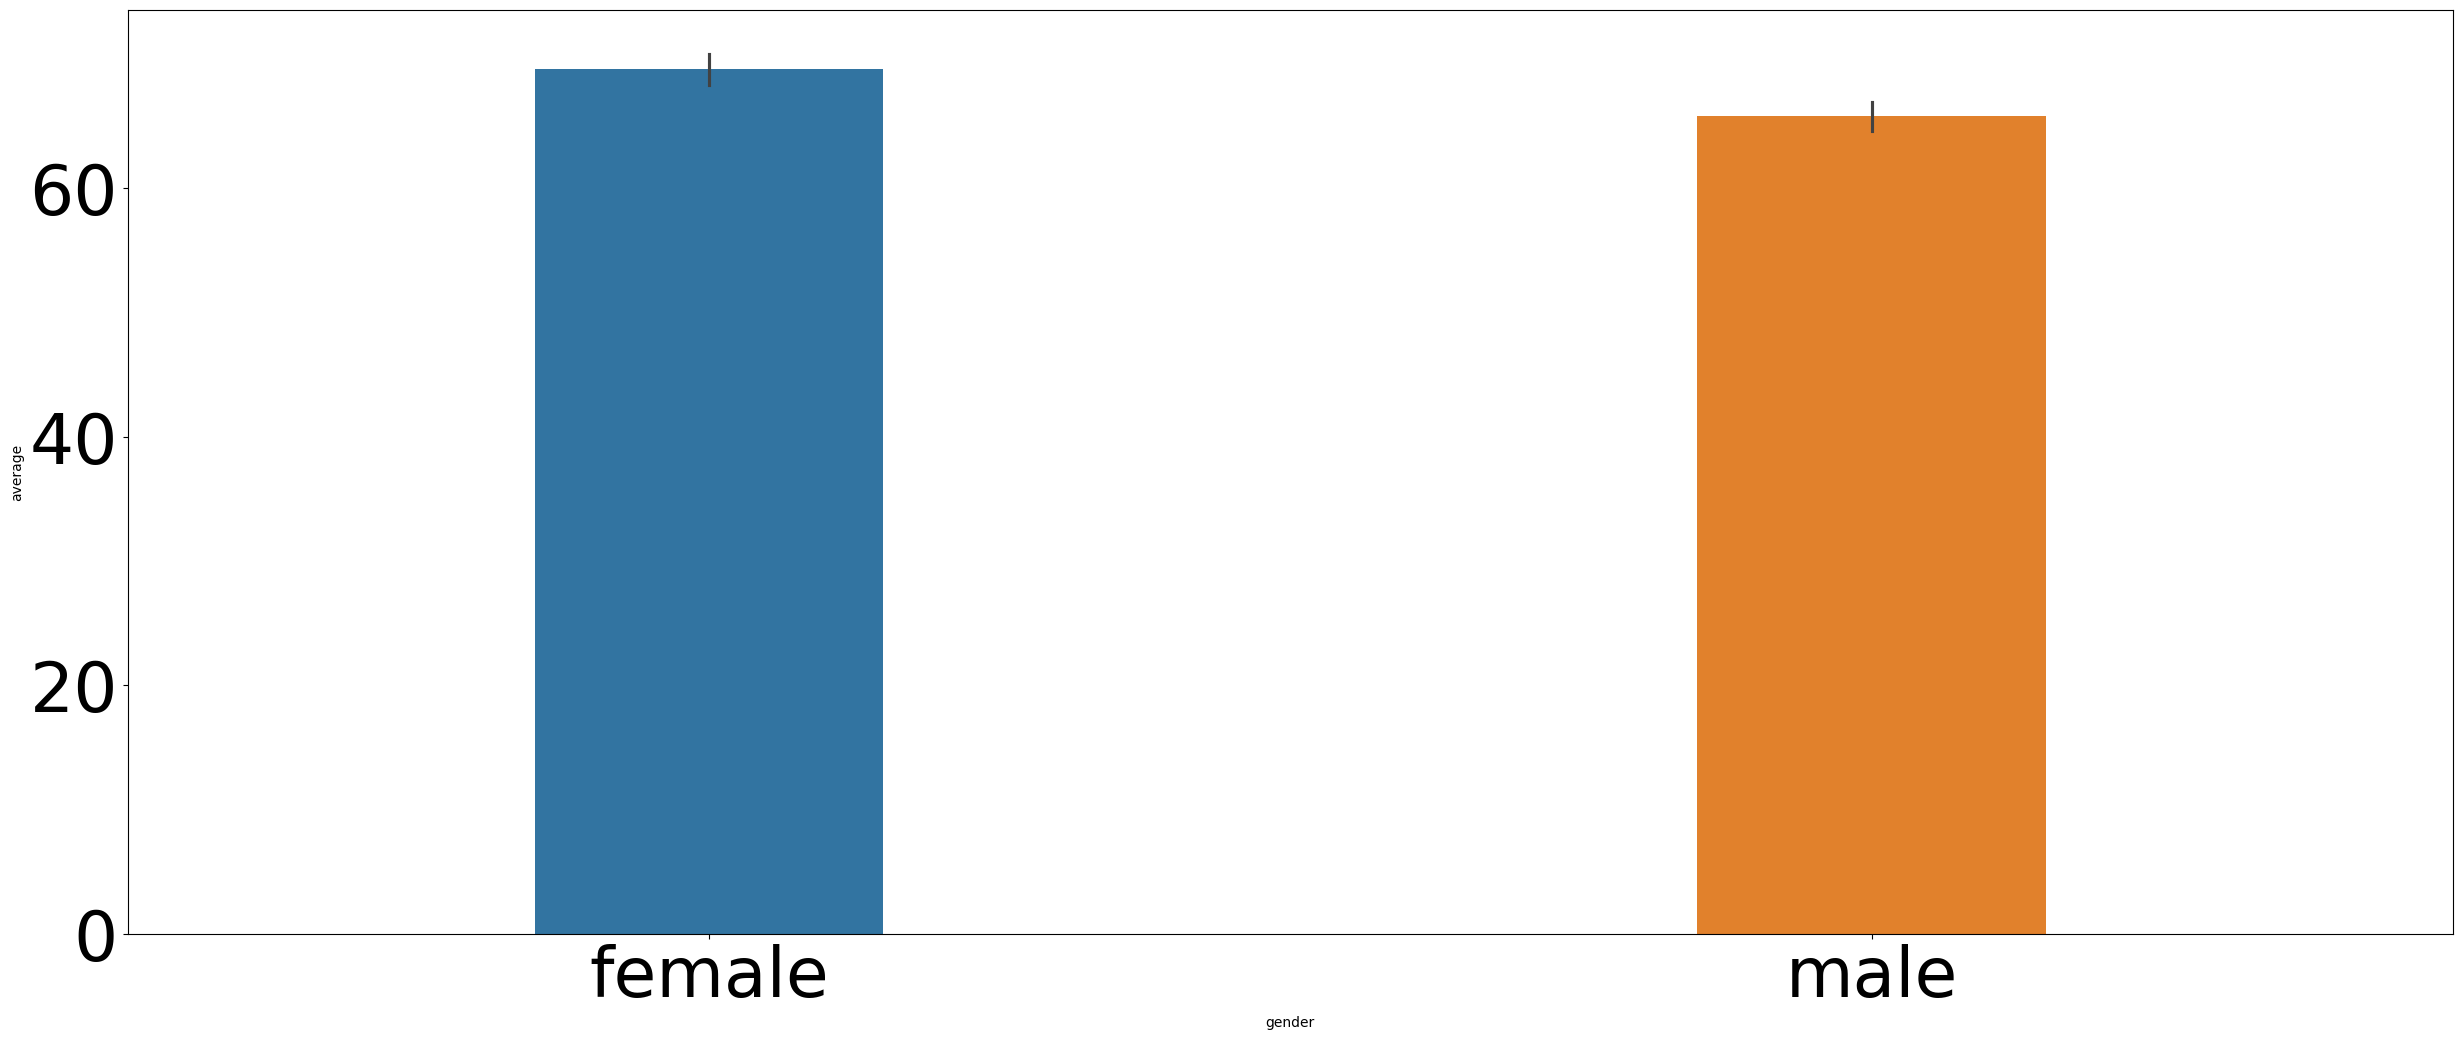

In [26]:
sns.barplot(data=df,x='gender',y='average',hue='gender',width=0.3)
plt.tick_params(axis='x', labelsize=50)  
plt.tick_params(axis='y', labelsize=50)
# # sns.barplot(data=df,x='gender',y='total score',hue='gender')
# sns.barplot(data=df,x='gender',y='math score',hue='gender')
# sns.barplot(data=df,x='gender',y='writing score',hue='gender')
# sns.barplot(data=df,x='gender',y='reading score',hue='gender')
# widht for adjust size of bars

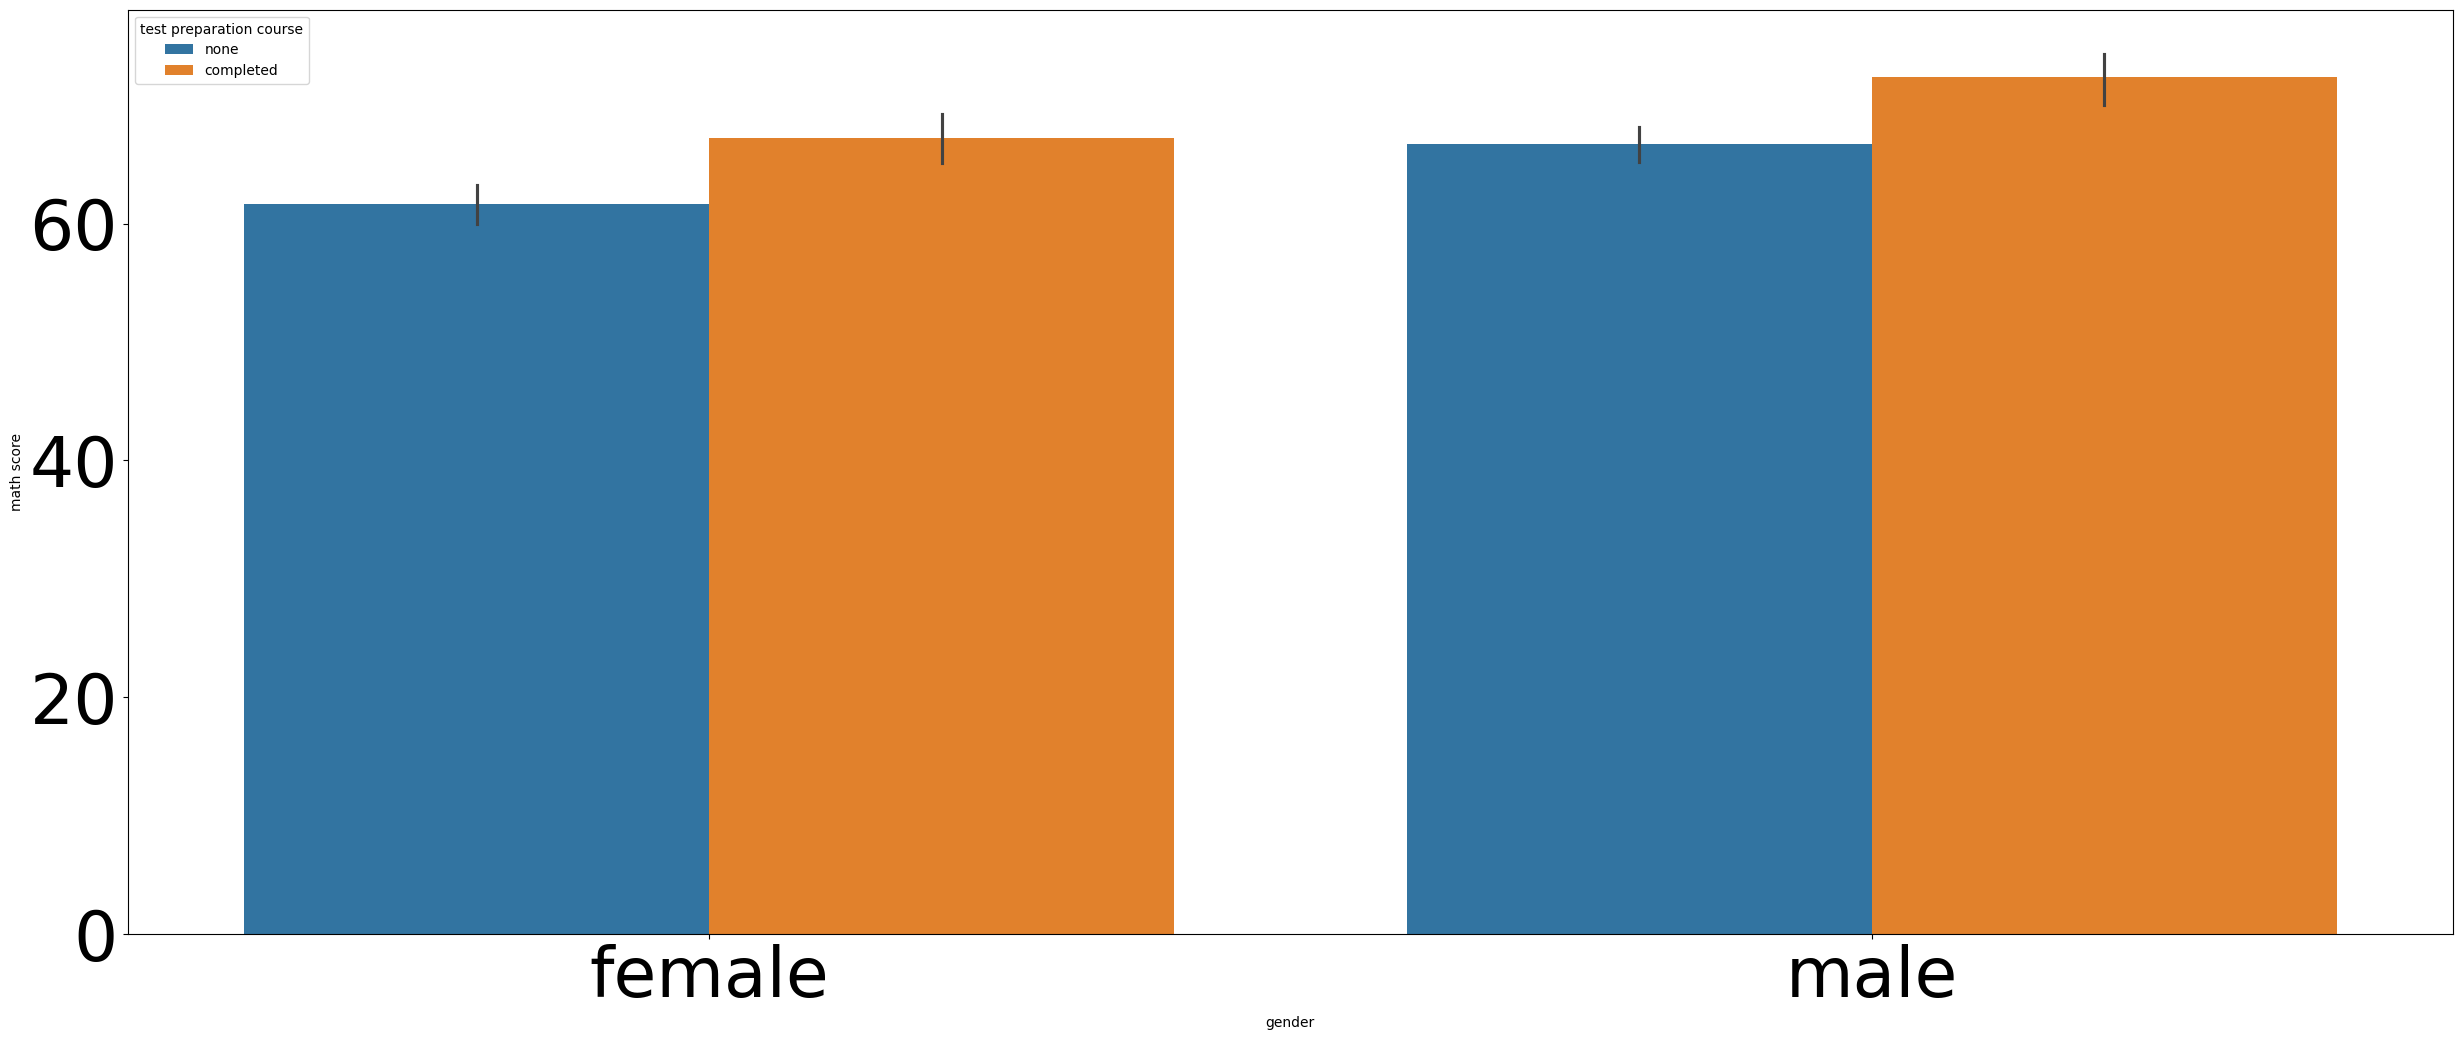

In [27]:
sns.barplot (x=df['gender'], y=df['math score'], hue=df['test preparation course'])
plt.tick_params(axis='x', labelsize=50)  
plt.tick_params(axis='y', labelsize=50)
# sns.barplot (x=df['gender'], y=df['reading score'], hue=df['test preparation course'])
# sns.barplot (x=df['gender'], y=df['writing score'], hue=df['test preparation course'])

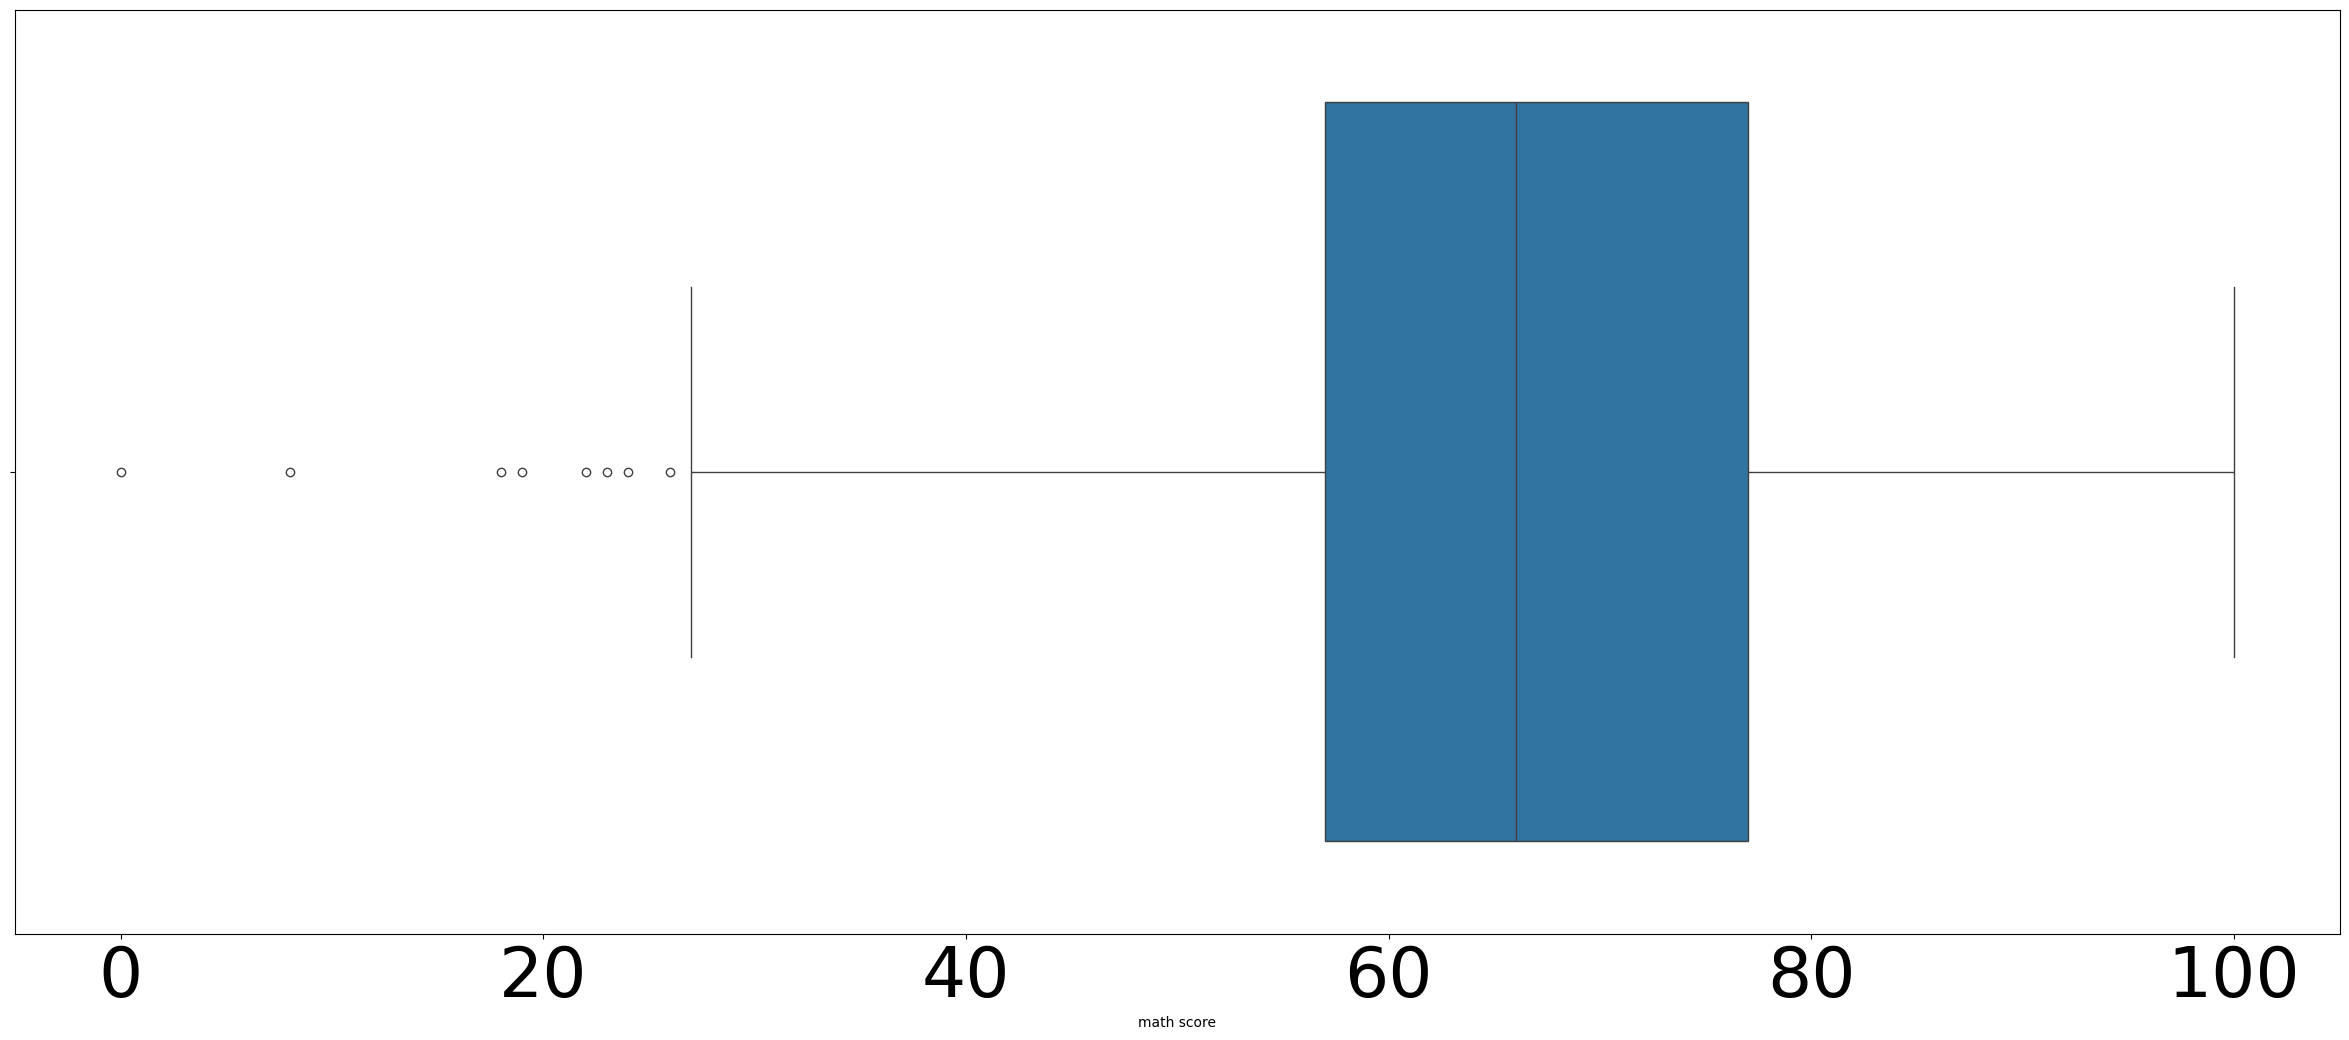

In [28]:
sns.boxplot(data=df,x='math score')
plt.tick_params(axis='x', labelsize=50)  
plt.tick_params(axis='y', labelsize=50)
# # sns.boxplot(data=df,x='reading score')
# sns.boxplot(data=df,x='writing score')

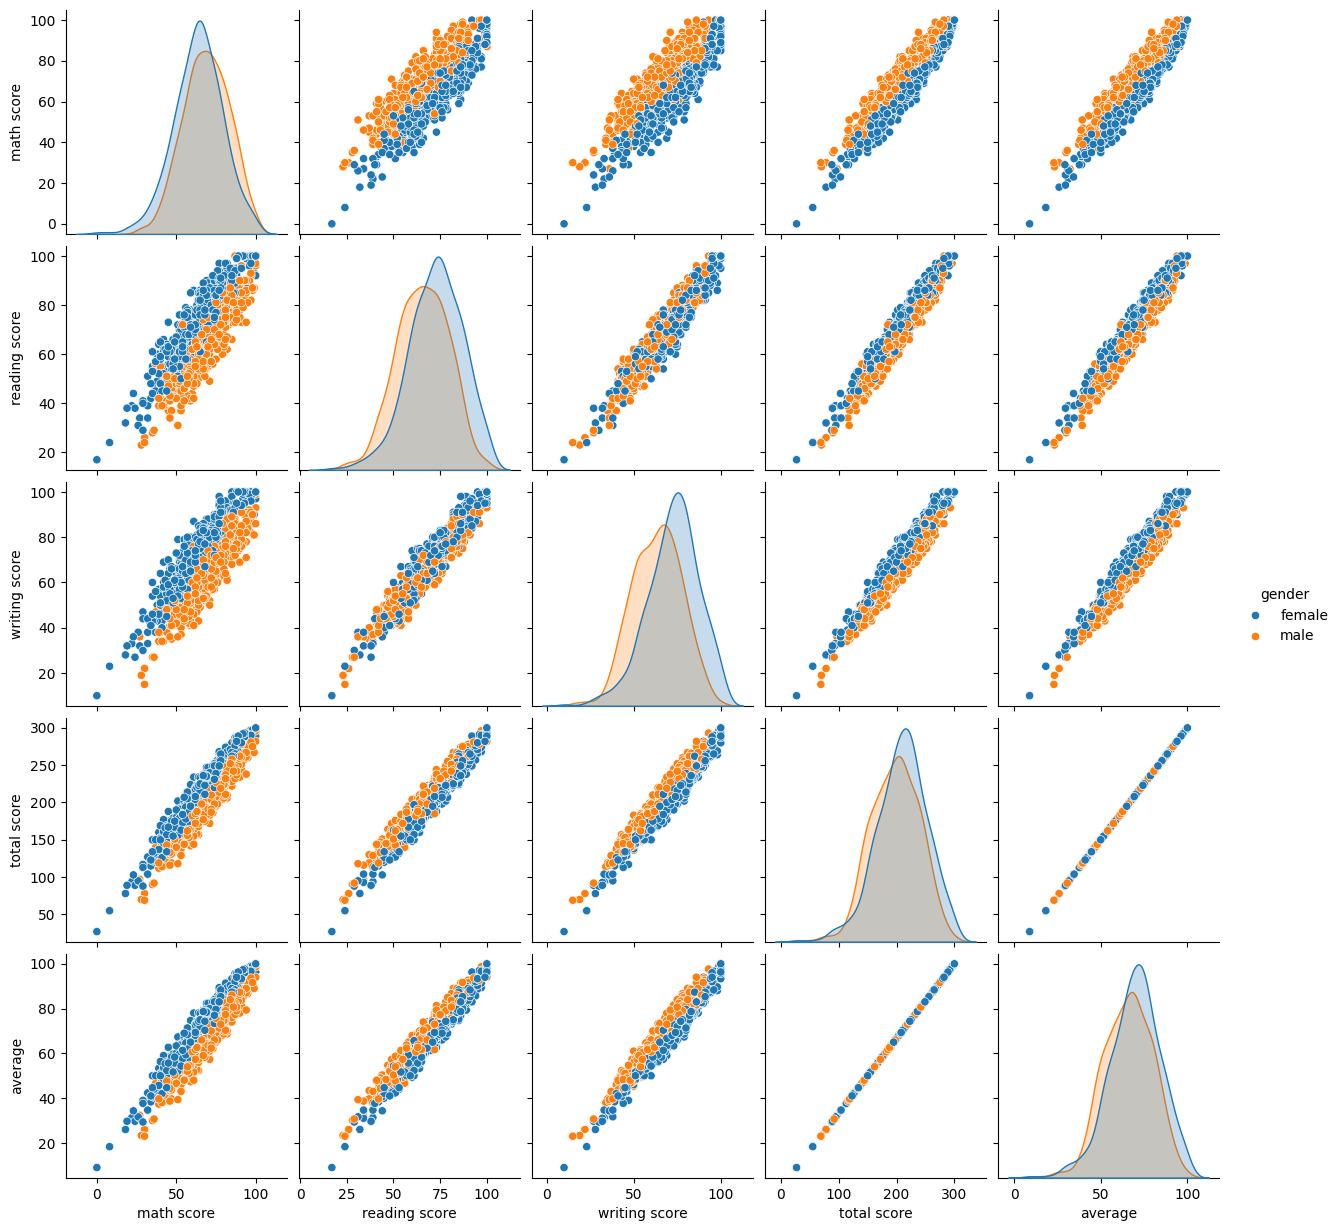

In [29]:
sns.pairplot(df,hue='gender')